# Sketch Classification

The sketch data is fetched from "Quick Draw!", a project by Google. The dataset contain Numpy Bitmap files (.npy) and is downloaded from [Google Cloud Platform](https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/numpy_bitmap). These sketches are already simplified (removed timestamp data, etc.) and scaled to 28x28 greyscale bitmap.

In this notebook, the focus will be on five sketch categories:
- Cat 
- Dog
- Flower
- House 
- Sun

Remember to set the *PATH_TO_DATA* parameter

In [1]:
import load_sketches as ld
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


PATH_TO_DATA = "sketches/"

## Load dataset
Loading dataset from local folder. The *load_sketches* returns shuffled data with labels, splitted for training and test. Then reshaping from 784 to 28x28.

In [2]:
train_set, test_set, train_labels, test_labels, label_strings = ld.load_sketches(0.7,PATH_TO_DATA)
train_set = np.reshape(train_set, (train_set.shape[0], 28, 28, 1))

A sketch could look like this:


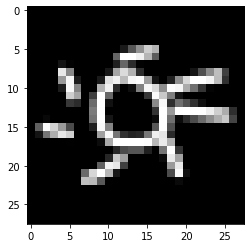

In [3]:
print("A sketch could look like this:")
pic = np.reshape(train_set[0], (28,28))

plt.imshow(pic, cmap="gray")
plt.show()

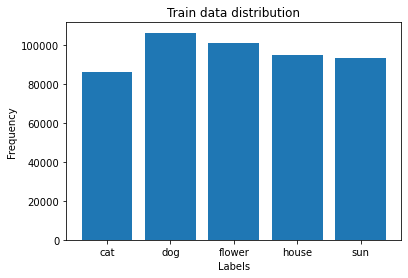

In [4]:
freq = [0 for i in range(5)]
for i in range(len(train_labels)):
    freq[train_labels[i]] += 1

f, ax = plt.subplots()
plt.bar(range(5), freq)
plt.title("Train data distribution")
plt.xlabel("Labels")
plt.ylabel("Frequency")
ax.set_xticks(range(5))
ax.set_xticklabels(label_strings)
plt.show()


## Set up model
This is the best model so far.

In [5]:
# Model definition
model = Sequential()
model.add(Conv2D(20, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(700, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [6]:
model.compile(optimizer=SGD(lr=0.001, momentum=0.8, decay=1e-6), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Train model

In [7]:
early_stop = EarlyStopping(monitor="val_loss",
                           min_delta=0,
                           patience=2,
                           verbose=0,
                           mode="auto",
                           baseline=None,
                           restore_best_weights=True)

In [8]:
# Trains the model and saves the history of the training
BATCHES = 200
EPOCHS = 9
history = model.fit(train_set, train_labels, batch_size=BATCHES, epochs=EPOCHS, validation_split=0.3, callbacks=[early_stop])

model.summary()

1689/1689 [==============================] - 115s 68ms/step - loss: 0.6945 - accuracy: 0.7777 - val_loss: 0.4053 - val_accuracy: 0.8555
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 32)          16032     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 700)            

## Save model

In [11]:
model.save("./")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./assets
